# Virus genome data set filtering

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def histograms(stats):
    # Creating histograms with custom labels
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust grid if you have a different layout

    stats[['N_share', 'Length']].hist(bins=50, log=True, ax=axes)

    # Setting y-axis label for the left column
    axes[0].set_ylabel('Number of sequences')

    axes[0].set_xlim(0, 1)
    axes[1].set_xlim(left=0)

    # Setting x-axis labels with the feature names
    features = ['N_share', 'Length']
    for ax, feature in zip(axes.flatten(), features):
        ax.set_xlabel(feature)
        ax.set_title('')  # Remove the title above each plot

    plt.tight_layout()
    plt.show()

# Parameters

In [4]:
fname_stats = '/Users/nils.petersen/dev/virus_dataset_curation/data/teststats/EBOV.stats.tsv'
stats = pd.read_csv(fname_stats, sep='\t')
stats

,Unnamed: 0.1,Unnamed: 0,Sequence,Reference,IsForward,ReferenceStart,ReferenceEnd,QueryStart,QueryEnd,EditDistance,IsSupplementaryAlignment,N_share,Length,ReferenceLength,Label,Segment,RelativeLength,FilteringStatus
0,0,4135,AF054908.1,NC_002549.1,True,469,2689,0,2220,30,False,0.0,2220,18959.0,EBOV,Unsegmented,0.117095,TooShort
1,1,4133,AF086833.2,NC_002549.1,True,0,18959,0,18959,0,False,0.0,18959,18959.0,EBOV,Unsegmented,1.000000,Ok
2,2,4130,AF272001.1,NC_002549.1,True,0,18959,0,18959,9,False,0.0,18959,18959.0,EBOV,Unsegmented,1.000000,Ok
3,3,4123,AF499101.1,NC_002549.1,True,0,18959,0,18960,13,False,0.0,18960,18959.0,EBOV,Unsegmented,1.000053,Ok
4,4,4102,AJ001707.1,NC_002549.1,True,4453,5483,0,1030,12,False,0.0,1030,18959.0,EBOV,Unsegmented,0.054328,TooShort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,4149,1094,MB015291.1,NaN,True,-1,-1,0,1491,-1,False,0.0,1491,NaN,NaN,NaN,NaN,Unmapped
4150,4150,1095,MB015294.1,NaN,True,-1,-1,0,1944,-1,False,0.0,1944,NaN,NaN,NaN,NaN,Unmapped
4151,4151,1152,MP001998.1,NaN,True,-1,-1,0,20,-1,False,0.0,20,NaN,NaN,NaN,NaN,Unmapped
4152,4152,1153,MP001999.1,NaN,True,-1,-1,0,20,-1,False,0.0,20,NaN,NaN,NaN,NaN,Unmapped


# Unmapped

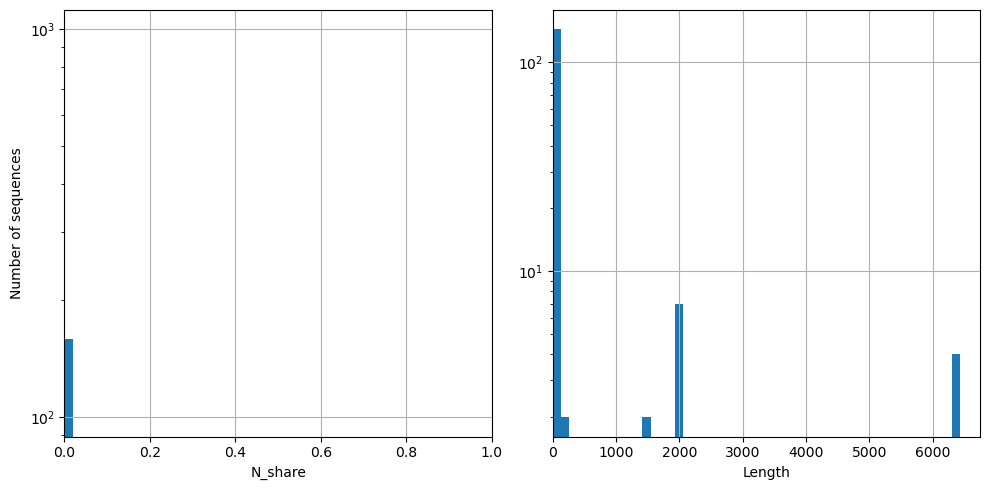

In [5]:
unmapped = stats[stats['FilteringStatus'] == 'Unmapped']
histograms(unmapped)

In [9]:
columns = ['Sequence','Length', 'N_share']
unmapped.sort_values(by="Length", ascending=False)[columns].head(20)


,Sequence,Length,N_share
4023,DL475795.1,6426,0.0
3996,CS402433.1,6424,0.0
4025,DL475798.1,6424,0.0
4024,DL475797.1,6414,0.0
4143,LQ817111.1,2037,0.0
4026,HC918462.1,2031,0.0
4029,HZ164400.1,2031,0.0
4028,HV753277.1,2031,0.0
4027,HC918463.1,2031,0.0
4150,MB015294.1,1944,0.0


# Too many N

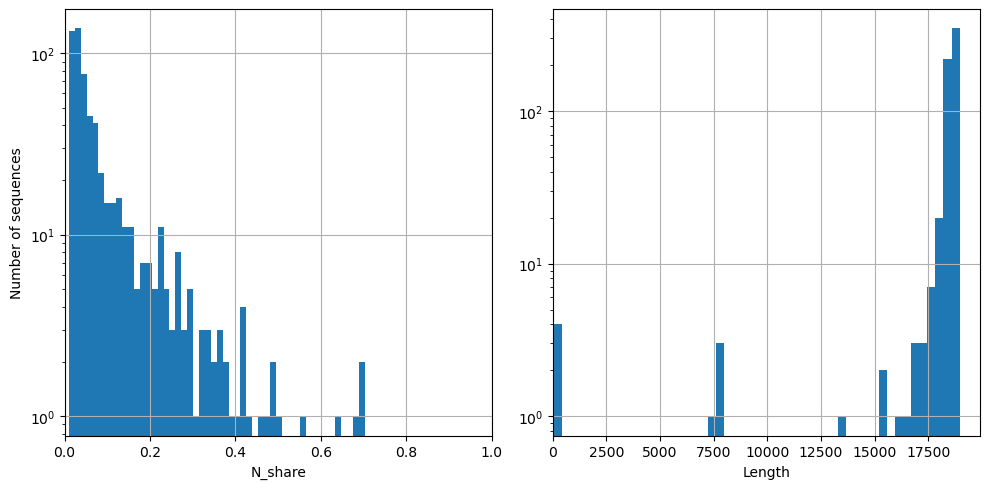

In [13]:
too_many_N = stats[stats['FilteringStatus'] == 'TooManyN']
histograms(too_many_N)

# Too short

In [19]:
def histograms_relative_length(stats):

    columns = ['N_share', 'Length', 'RelativeLength']
    ncols = len(columns)
    # Creating histograms with custom labels
    fig, axes = plt.subplots(1, ncols, figsize=(12, 4))  # Adjust grid if you have a different layout

    stats[columns].hist(bins=50, log=True, ax=axes)

    # Setting y-axis label for the left column
    axes[0].set_ylabel('Number of sequences')

    axes[0].set_xlim(0, 1)
    axes[1].set_xlim(left=0)
    axes[2].set_xlim(left=0)

    # Setting x-axis labels with the feature names
    for ax, feature in zip(axes.flatten(), columns):
        ax.set_xlabel(feature)
        ax.set_title('')  # Remove the title above each plot

    plt.tight_layout()
    plt.show()

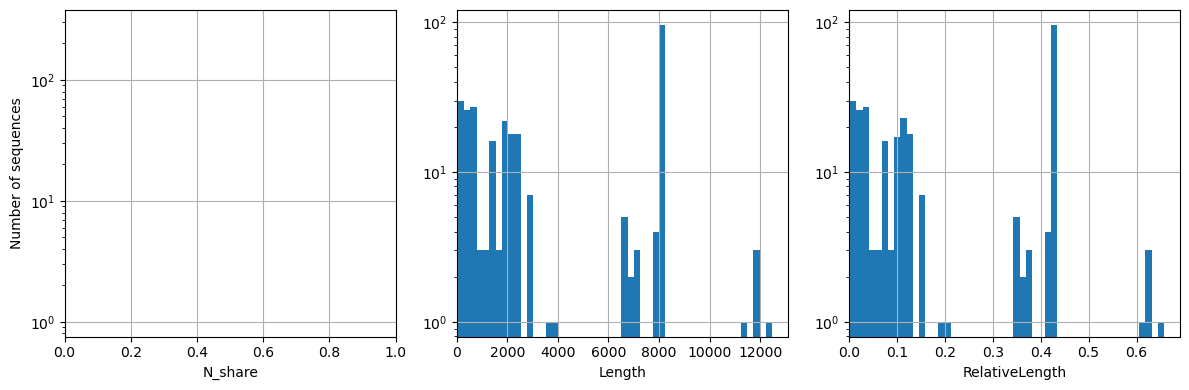

In [20]:
too_short = stats[stats['FilteringStatus'] == 'TooShort']
histograms_relative_length(too_short)

In [21]:
columns = ['Sequence','Length', 'N_share']
unmapped.sort_values(by="Length", ascending=False)[columns].head(20)

,Sequence,Length,N_share
4023,DL475795.1,6426,0.0
3996,CS402433.1,6424,0.0
4025,DL475798.1,6424,0.0
4024,DL475797.1,6414,0.0
4143,LQ817111.1,2037,0.0
4026,HC918462.1,2031,0.0
4029,HZ164400.1,2031,0.0
4028,HV753277.1,2031,0.0
4027,HC918463.1,2031,0.0
4150,MB015294.1,1944,0.0


# Ok

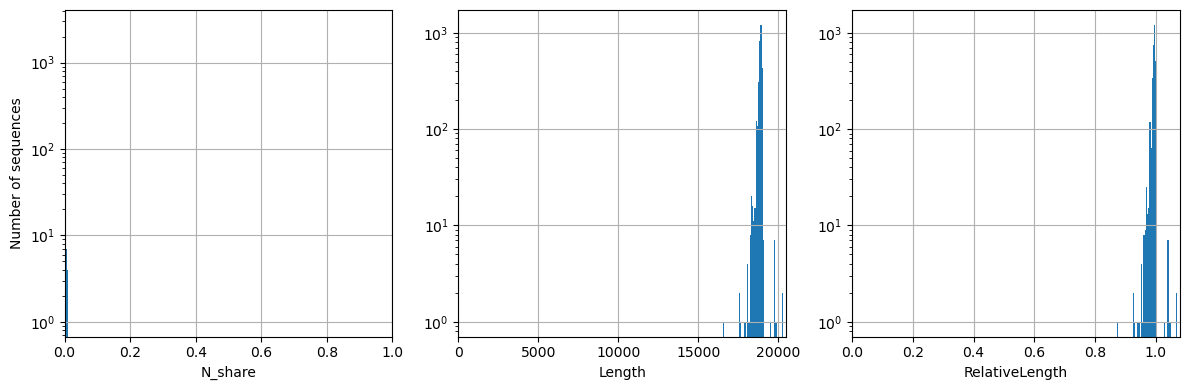

In [22]:
ok = stats[stats['FilteringStatus'] == 'Ok']
histograms_relative_length(ok)